In [26]:
import pandas as pd
import numpy as np

In [27]:
dataset=pd.read_csv('Testdata.csv')

/tmp/ipykernel_21652/2973351380.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('Testdata.csv')


In [28]:
dataset.head()

,tradeId,regulator,version,assetClass,clDateTime,clStatus,cflag,eFlag,cDateTime,method,...,seller,endDate,sType,Product,price,terminationDate,party,PartyId,transactionType,Reporting Status
0,1,SEBI,1,FX,2023-07-18T11:47:26.075000Z,True,FULLY,False,2023-12-10T07:37:58.548000Z,NonElectronic,...,Party1,2023-05-26T05:23:44.110000Z,Cash,Swap,NaN,2023-07-02T04:01:17.940000Z,PartyZ,1,EXIT,Failed Ack
1,2,SEBI,9,FX,2023-08-02T03:12:48.207000Z,False,FULLY,False,2023-10-03T22:32:10.991000Z,NotConfirmed,...,Party2,2023-07-23T23:43:15.460000Z,Cash,Swap,NaN,2023-08-15T13:25:45.442000Z,PartyX,4,EXIT,ACK
2,3,SEBI,8,FX,2023-05-09T07:42:36.475000Z,False,FULLY,False,2023-03-09T20:32:31.302000Z,NonElectronic,...,Party2,2023-08-08T11:13:43.217000Z,Physical,Swap,NaN,2023-07-07T02:03:20.354000Z,PartyX,4,TRADE,Processing Error
3,4,SEBI,1,FX,2023-10-01T05:02:54.209000Z,False,FULLY,True,2023-11-21T06:53:09.983000Z,Electronic,...,Party2,2023-07-31T19:30:37.266000Z,Cash,forward,91773.25433,2023-08-02T04:55:34.632000Z,PartyK,2,TRADE,Acknowledged
4,5,SEBI,1,FX,2023-01-23T20:53:01.076000Z,True,ONEWAY,False,2023-08-05T17:06:08.895000Z,Electronic,...,Party1,2023-12-04T19:38:57.326000Z,Cash,Swap,NaN,2023-02-08T06:49:44.186000Z,PartyX,4,TRADE,Acknowledged


In [29]:
# remove any duplicate data that is present in the dataset
dataset.drop_duplicates(inplace=True)

In [30]:
dataset.describe()

,tradeId,version,rate,price,PartyId
count,50000.000000,50000.000000,50000.000000,15014.000000,50000.000000
mean,25000.500000,4.991940,4985.640510,502292.898972,3.163600
std,14433.901067,2.593339,2892.605229,288205.734165,1.342919
min,1.000000,1.000000,0.630700,108.503208,1.000000
25%,12500.750000,3.000000,2473.364300,253646.139675,2.000000
50%,25000.500000,5.000000,4988.018500,501724.834200,3.000000
75%,37500.250000,7.000000,7484.013200,751081.198725,4.000000
max,50000.000000,9.000000,9999.865100,999940.821500,5.000000


In [31]:
# i want to get few unique rows out of this large dataset that covers all the unique values of the dataset
# i want to get 10% of the dataset- i would suggest trying will many random stage and the one that has the best result should be used

dataset_sample=dataset.sample(frac=0.1,random_state=1)


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


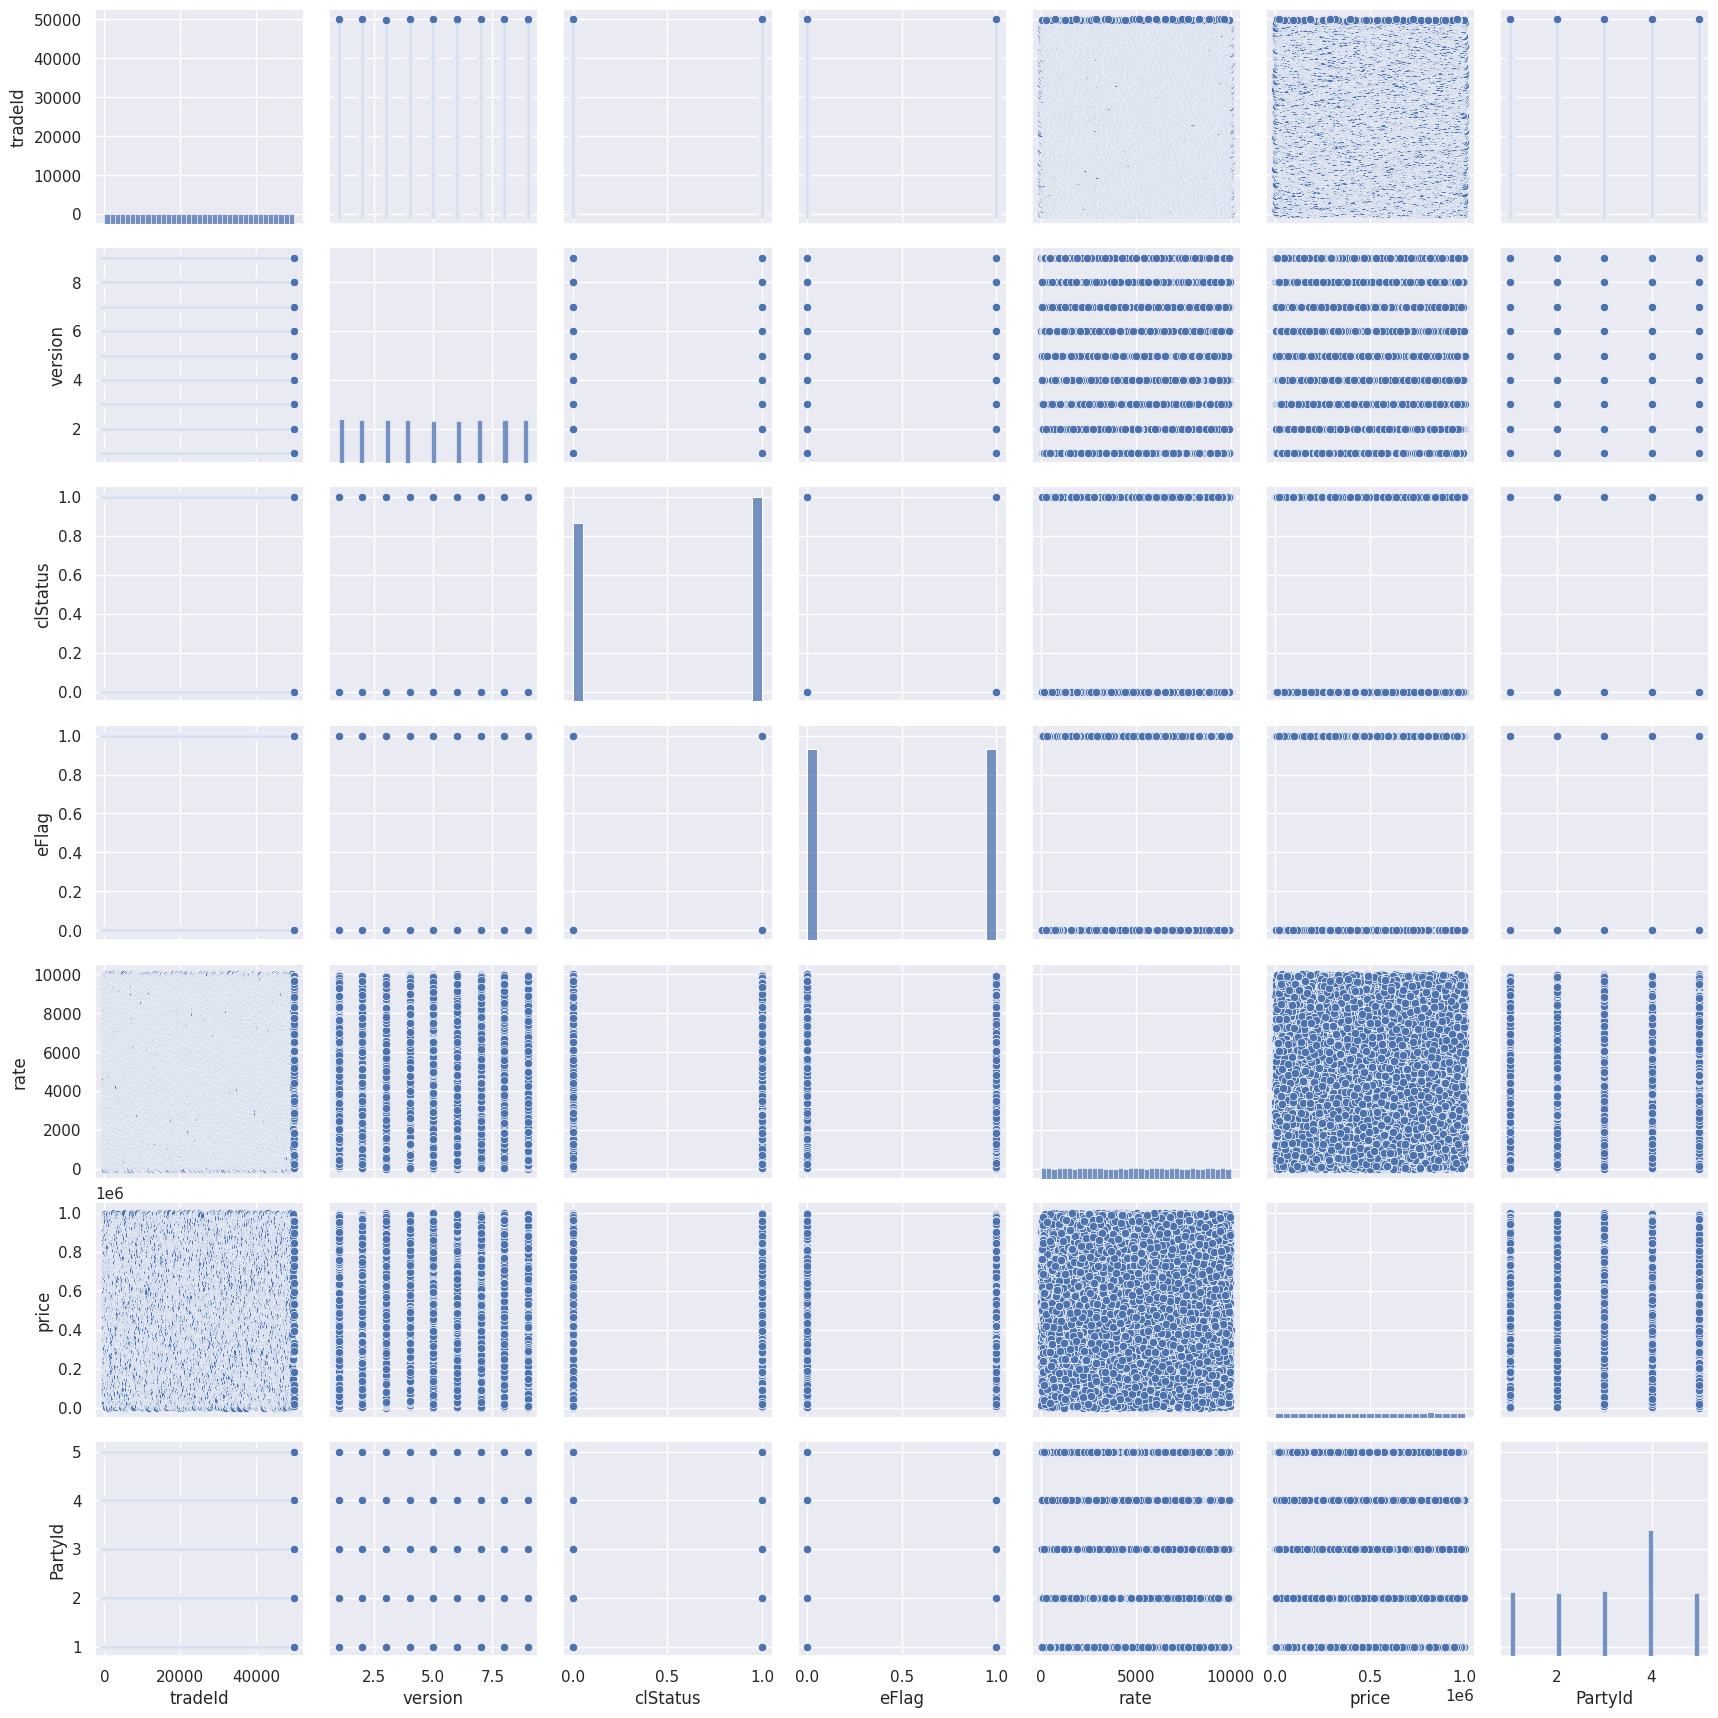

In [15]:
# compare the distribution of the dataset to the original dataset for each feature
# this is to ensure that the sample dataset is representative of the original dataset
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
# plotting the scatter plt for each feature at once
sns.pairplot(dataset)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


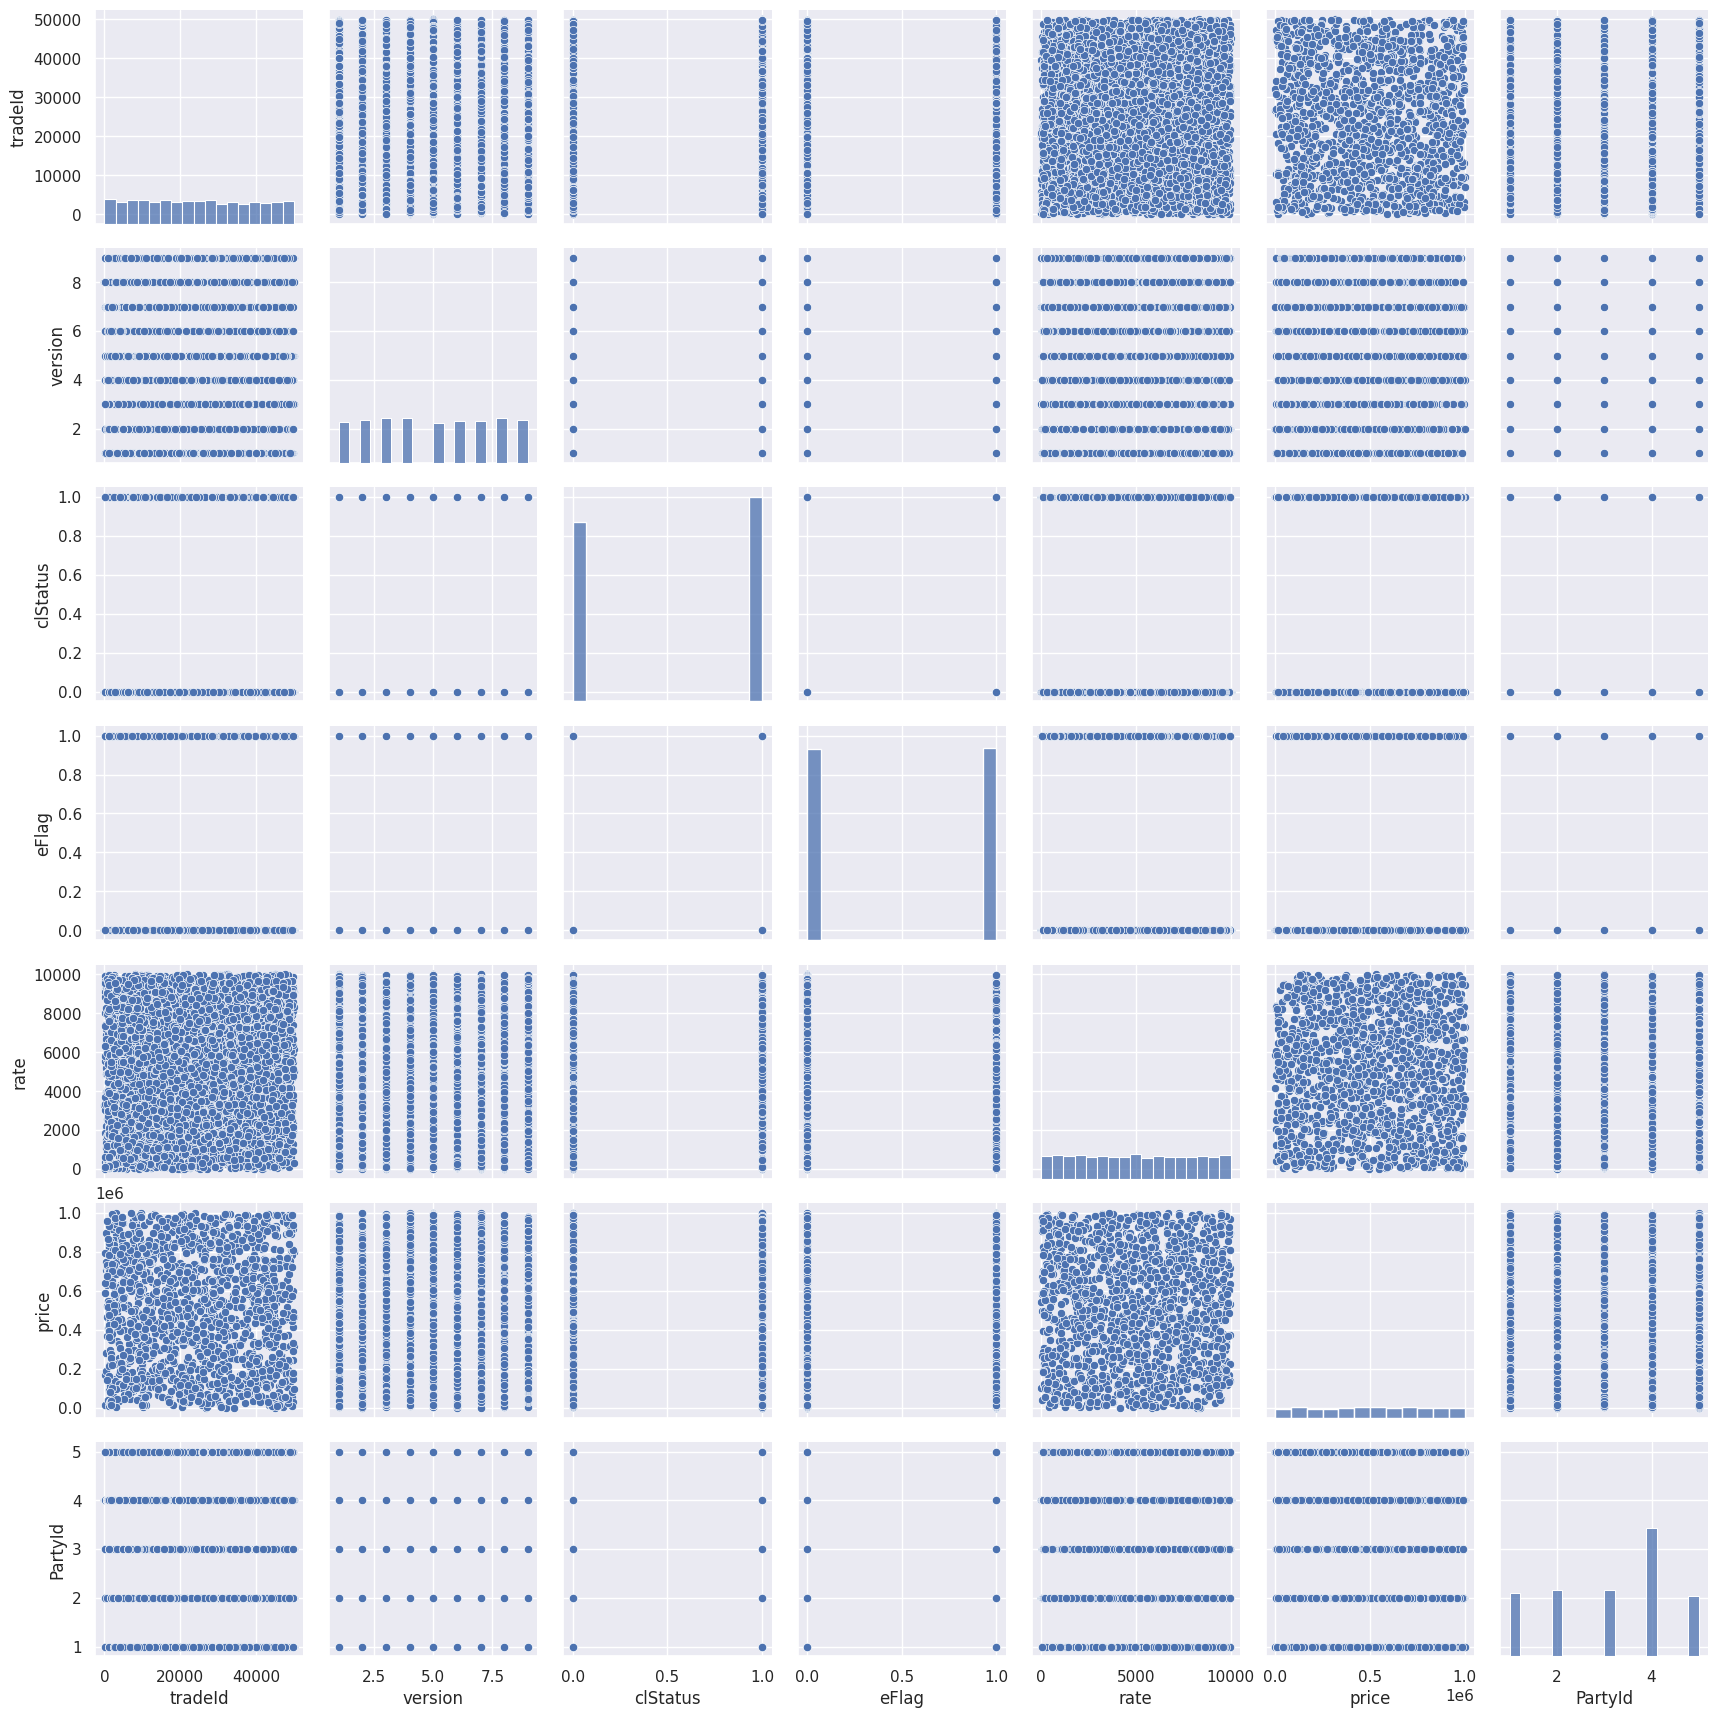

In [32]:
sns.pairplot(dataset_sample)

In [33]:
# now try to plot the data
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# how to compare that two distributions are close to each other
# we can use the kolmogorov smirnov test
# this test is used to compare two distributions
# it is a non parametric test
# code for the test
from scipy.stats import ks_2samp
""" 
# this function takes two arrays and returns the p value
# p value is the probability that the two distributions are same
# if p value is less than 0.05 then the two distributions are different
# if p value is greater than 0.05 then the two distributions are same
# we will use this function to compare the distribution of the sample dataset with the original dataset
# code
"""
def ks_test(dataset,dataset_sample):
    p_value=ks_2samp(dataset['price'],dataset_sample['price'])[1]
    # also plot the two distributions sing kde plot
    print("p_value is ",p_value)
    # print("the random state used is ")
    sns.kdeplot(dataset['price'],label='dataset')
    sns.kdeplot(dataset_sample['price'],label='dataset_sample')
    plt.legend()
    return p_value


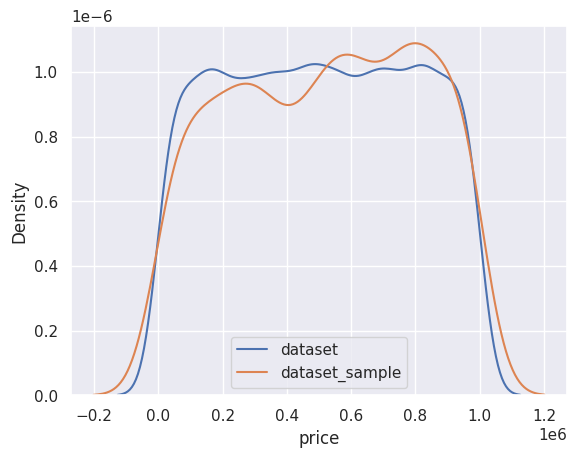

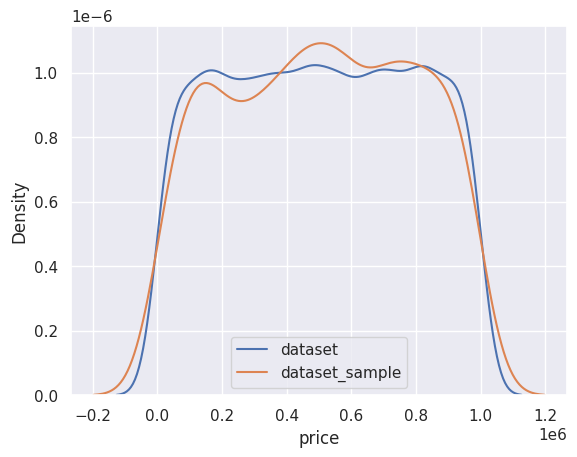

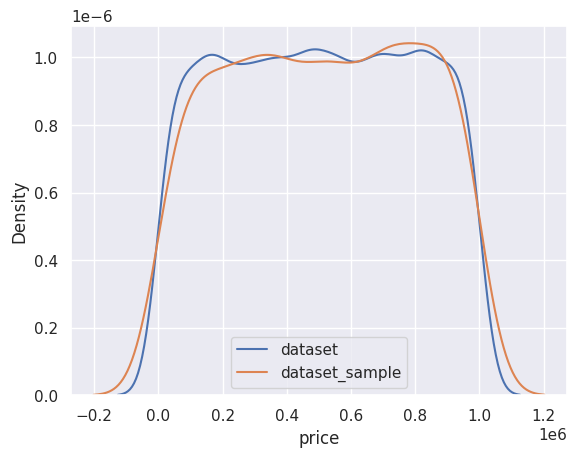

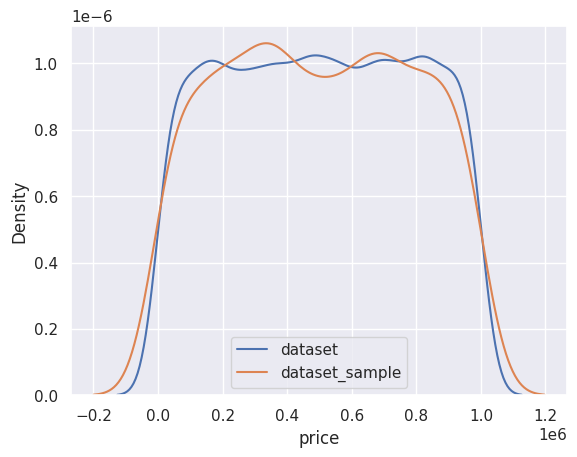

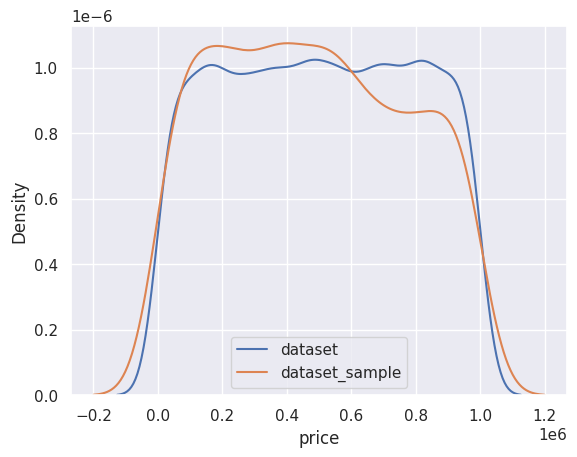

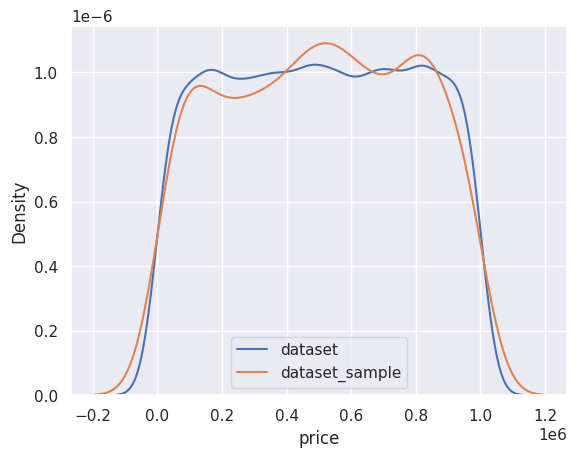

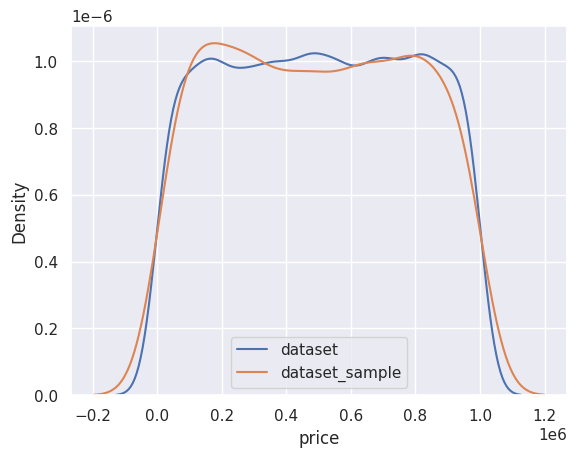

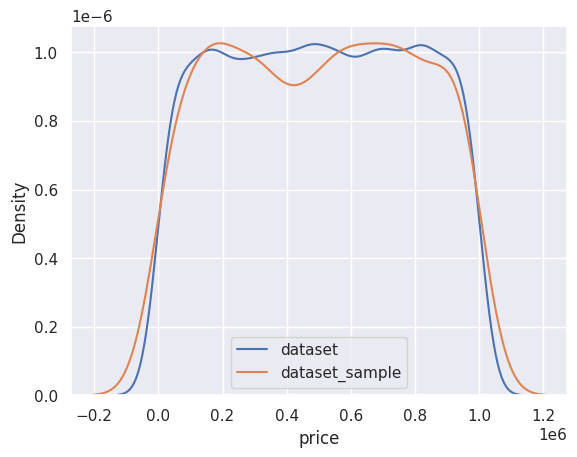

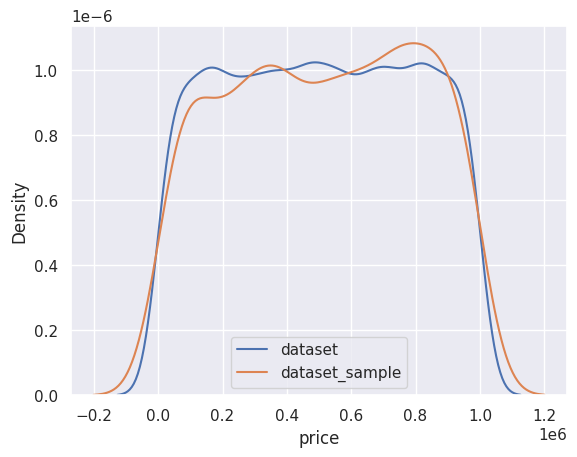

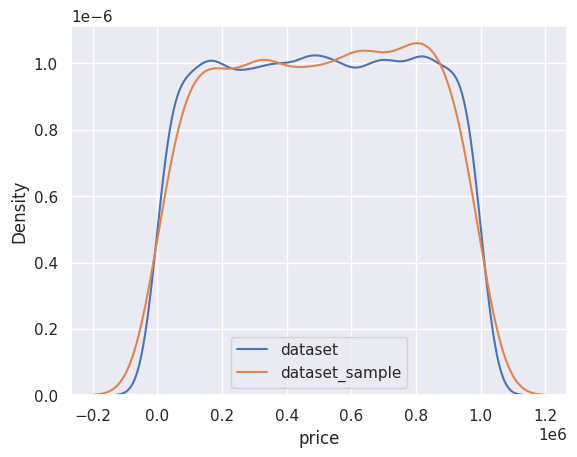

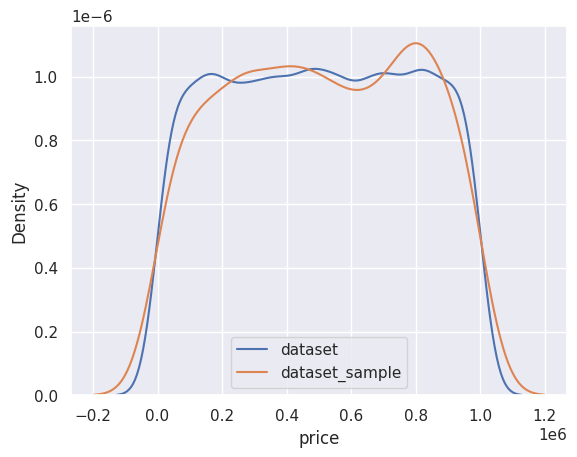

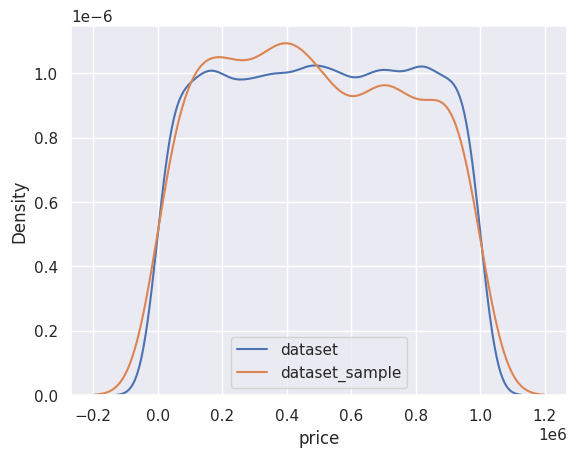

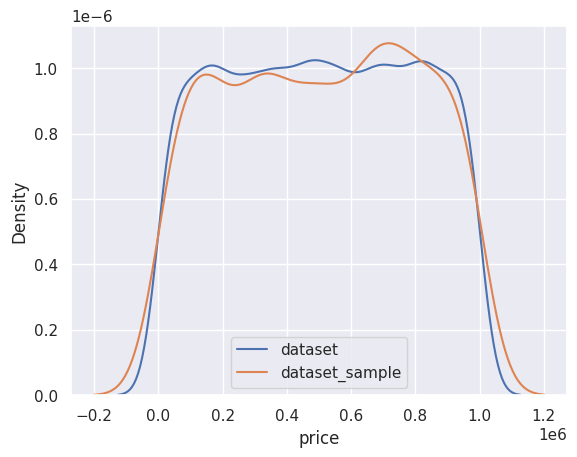

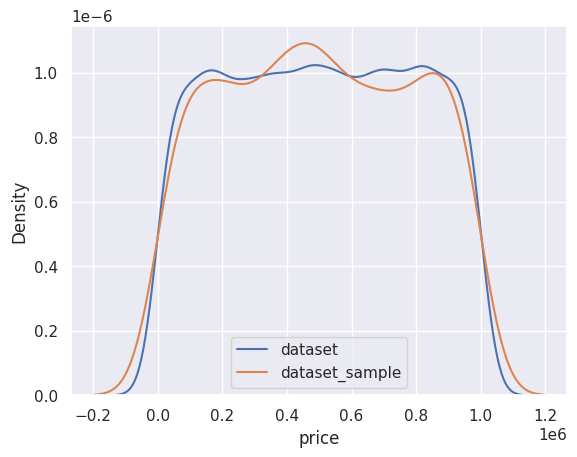

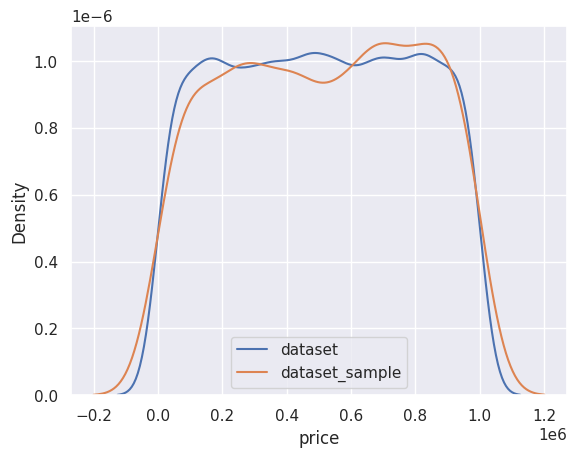

In [40]:
# write a function that try different random state and use the remaining data as test set for checking which dataset sample is best
def get_dataset_sample(dataset,random_state):
    dataset_sample=dataset.sample(frac=0.1,random_state=random_state)
    # now apply the model on this dataset
    
    return dataset_sample
# now i want to try atleast 15 random state
for i in range(15):
    dataset_sample=get_dataset_sample(dataset,i)
    ks_test(dataset,dataset_sample)
    plt.show()

0.9957102533996485

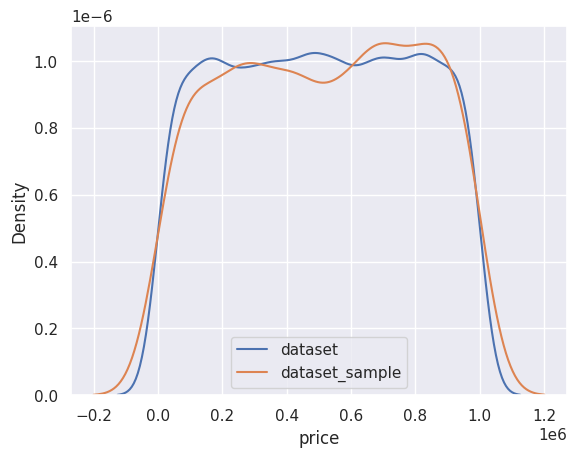

In [42]:
ks_test(dataset,dataset_sample)